# Homework 3   Group S 

####     Silvia Schmid    (482825)      
####     Lea Schwalb      (406994) 
####     Geuhan Kim       (4043225)   
####     Andreas Kandolf  (491344)       
####     Louise Sertic    (0501825)         
                                  

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy
from IPython.display import Image

# Aufgabe 1 

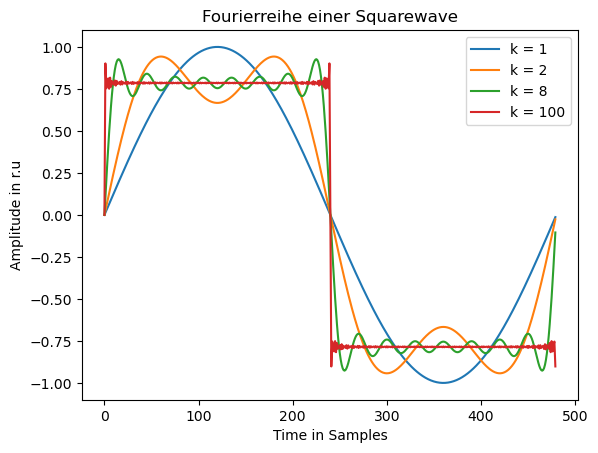

In [2]:
# Constants 
fs =    48000       # [Hz]
f0 =    100         # [Hz]
N  =    480         # [Samples]
K  =    [1,2,8,100] # []
w0 =    2*np.pi*f0 
t  =    np.arange(0,N,1) 



# Zeitsignal Signal als Fourierreihe 
results =[]

for i in K:
    x = 0 
    for k in np.arange(i):
        k += 1
        x +=  1/(2*k-1)*np.sin((2*k-1)*w0*t/fs)
    results.append(x)


# Squarewave Plot
for k, a in enumerate(results): 
    plt.plot(t,a, label=f"k = {K[k]}")

plt.title("Fourierreihe einer Squarewave")
plt.legend()
plt.ylabel("Amplitude in r.u")
plt.xlabel("Time in Samples")
plt.show()



In [3]:
# Spektrum direkt aus Fourierserie berechnen 

spektren = []
freq_axis = []


# Need this later
spektren_single_sided = []
freq_axis_single_sided = []



for i in K:
    amplituden =[]
    freq_bins = []
    for k in np.arange(i):
        k += 1
        amplitude =  1/(2*k-1)
        amplituden.append(amplitude)
        frequenz = (2*k-1)*f0
        freq_bins.append(frequenz) 
    
    # save single sided (will need that later for np.fft.ifft, that turend out to need a complicated different input) 
    spektren_single_sided.append(amplituden)
    freq_axis_single_sided.append(freq_bins)

    # save mirrored (will use this for plots)
    freq_bins_beiseitig = np.concatenate((-1*np.array(freq_bins)[::-1],np.array(freq_bins)))
    amplituden = np.concatenate((np.array(amplituden)[::-1], (np.array(amplituden)))) 
    
    freq_axis.append(freq_bins_beiseitig)
    spektren.append(amplituden)



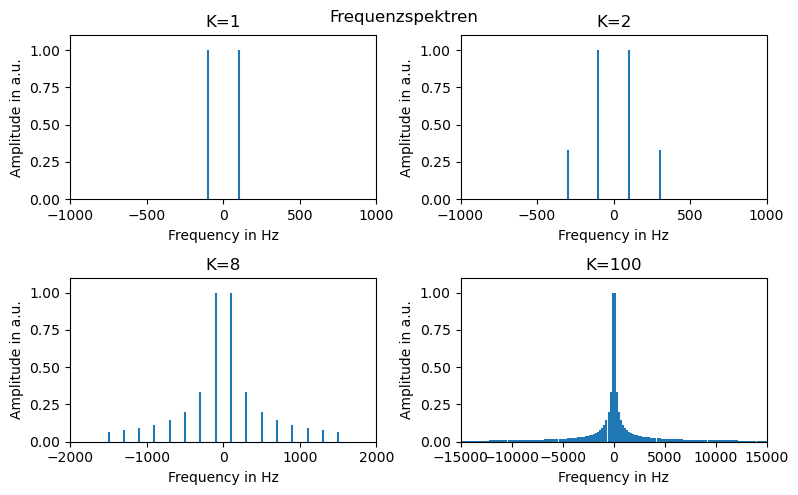

In [5]:
#Plots

fig, axs = plt.subplots(2, 2, figsize=(8, 5), gridspec_kw={'width_ratios': [2, 2], 'height_ratios': [2, 2]})

# Vertikale Linien für jeden Subplot plotten
for i, ax in enumerate(axs.flat):
    k = K[i]
    ax.vlines(freq_axis[i], np.zeros(len(spektren[i])), spektren[i])
    #ax.set_xscale("log")
    ax.set_ylim(0, 1.1)
    ax.set_xlim(-1000, 1000)
    if k > 5:
        ax.set_xlim(-2000, 2000)
    if k > 10:
        ax.set_xlim(-15000, 15000)

    
    ax.set_title('K={}'.format(k))
    ax.set_xlabel('Frequency in Hz')
    ax.set_ylabel('Amplitude in a.u.')

plt.tight_layout()
plt.suptitle("Frequenzspektren")
plt.show()


Rekonstruktion: 

Wir müssen beachten, dass bei einem Beidseitigen Spekrum die Fourierserie auch für negative frequenzen gezählt wird. 
Für $ f = -f_0 $ wird $sin(tf) = sin(-tf_0) = -sin(tf_0) $ und macht damit einen Phasen sprung um $\pi$.



In [7]:
spektren_mit_nullen = []

for j,i in enumerate(K): 
    fmax = 100*i
    f = np.zeros(2*(fmax)+1)
    for k, frequenz in enumerate(freq_axis[j]):
        f[frequenz+fmax]= spektren[j][k]
    spektren_mit_nullen.append(f)   
    
    

plt.vlines(np.arange(len(spektren_mit_nullen[3])), 0, spektren_mit_nullen[3])


IndexError: index 500 is out of bounds for axis 0 with size 401

# Aufgabe 1 b) 

Der unterschied zwischen $Figur. \ 1$ und der inversen DFT besteht darin, dass eine perfekte Rechteckwelle nur durch unendliche Fourierserie realisiert wird (in unserem Fall K = inf). mit zunehmendem K konvergiert die Serie gegen die perfekte Rechtekwelle. Für "kleine" Werte werden bei der Summe der einzelnen Sinuswellen immer Oszillationen an den Kanten der Rechteckwellen sichtbar sein.    

In [8]:
print(spektren[1][1])

1.0


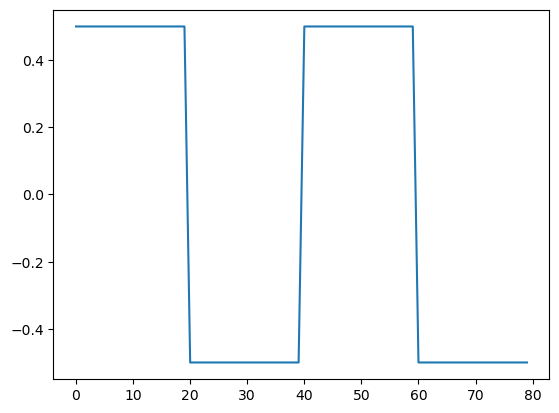

80
0j
0j
(2-25.41240947234941j)
0j
0j
0j
(2-8.330599540180835j)
0j
0j
0j
(2-4.82842712474619j)
0j
0j
0j
(2-3.26370337425758j)
0j
0j
0j
(2-2.341699132225081j)
0j
0j
0j
(2-1.708161370926934j)
0j
0j
0j
(2-1.225601576279864j)
0j
0j
0j
(2-0.8284271247461898j)
0j
0j
0j
(2-0.4801575181602312j)
0j
0j
0j
(2-0.15740341364923738j)
0j
0j
0j
(2+0.15740341364923705j)
0j
0j
0j
(2+0.48015751816023j)
0j
0j
0j
(2+0.8284271247461915j)
0j
0j
0j
(2+1.2256015762798644j)
0j
0j
0j
(2+1.708161370926934j)
0j
0j
0j
(2+2.3416991322250795j)
0j
0j
0j
(2+3.2637033742575774j)
0j
0j
0j
(2+4.828427124746189j)
0j
0j
0j
(2+8.330599540180835j)
0j
0j
0j
(2+25.41240947234941j)
0j


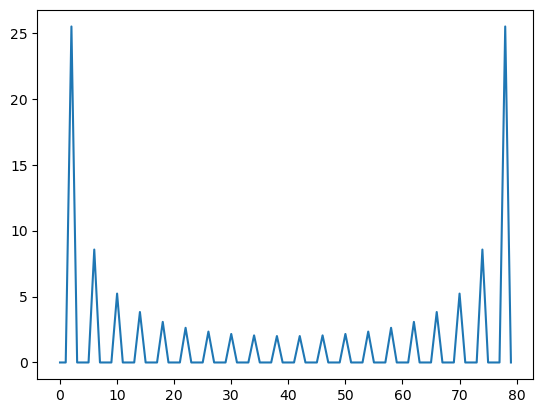

In [9]:


y = np.ones(20)
z = np.zeros(20)


signal = np.concatenate((np.concatenate((y,z)),np.concatenate((y,z)))) - 0.5


plt.plot(np.arange(len(signal)),signal)
plt.show()
fft = np.fft.fft(signal)
plt.plot(np.arange(len(fft)),np.abs(fft))
print(len(fft))

for i, j in enumerate(fft): 
    print(fft[i])




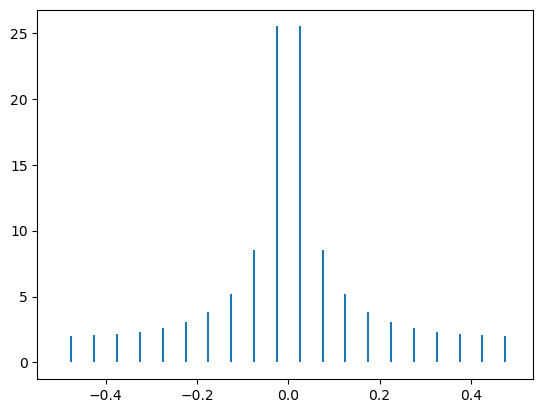

IndexError: list index out of range

In [10]:
fft = np.fft.fft(signal) 
fft_freq = np.fft.fftfreq(len(signal))
plt.vlines(fft_freq, 0, np.abs(fft))
plt.show()
###


ifft = np.fft.ifft(spektren_mit_nullen[1])

plt.plot(np.arange(len(ifft)),ifft)
#plt.xscale("log")
#plt.ylim(0,5)
#plt.ylim(0,1)

print(spektren_mit_nullen[2])




#####################







c:\Users\ankan\University\Programming\miniconda3\envs\AKT\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


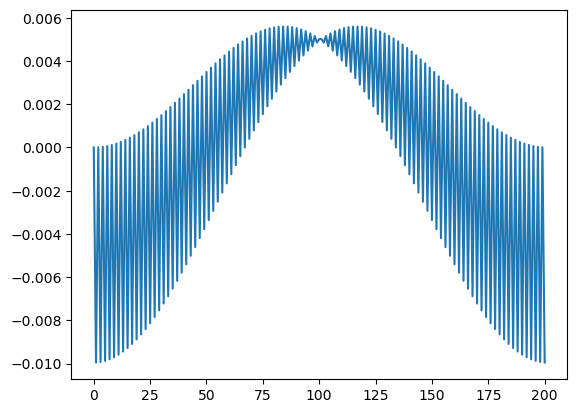

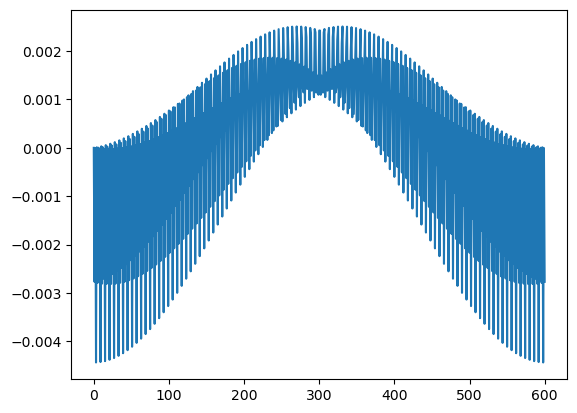

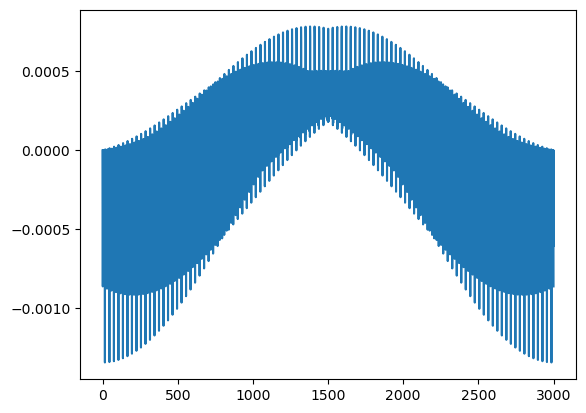

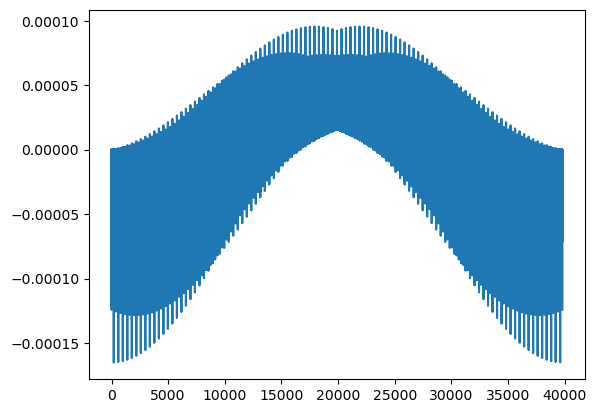

In [11]:
spektren_mit_nullen = []

for j,i in enumerate(K): 
    fmax = 100*(2*i-1)
    f = np.zeros(fmax)
    for k, frequenz in enumerate(freq_axis_single_sided[j]):
        #print(k)
        f[frequenz-1]= spektren[j][k]
    spektren_mit_nullen.append(f)   




spektren_für_ifft = []

for spektrum in spektren_mit_nullen:
    y = np.concatenate((np.zeros(1), spektrum, -1*spektrum))
    spektren_für_ifft.append(y)
    #print(len(y))




for spektrum in spektren_für_ifft:
     plt.plot(np.arange(len(spektrum)),np.fft.ifft(spektrum))
     plt.show()

                       

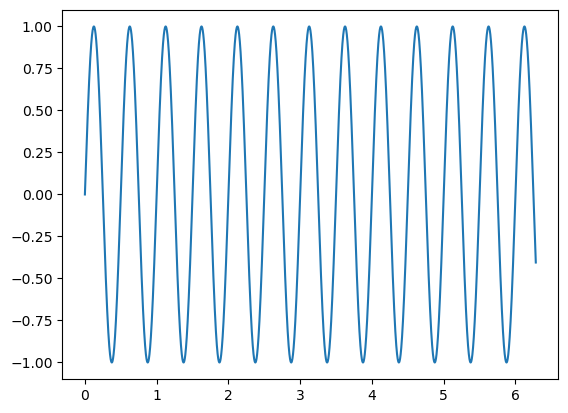

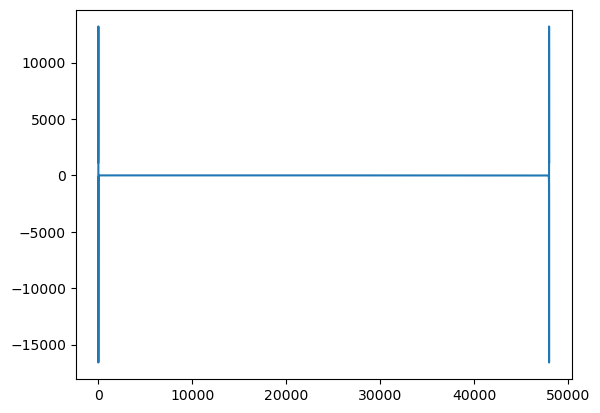

(1163.5281102639651+0j)
(1170.9415900404454+19.791823737222963j)
(1193.7600024248293+40.35515684724203j)
(1233.8336993142743+62.5651224653788j)
(1294.6806525813527+87.53473479730614j)
(1382.3294402746806+116.82711329105035j)
(1507.0289115557894+152.84111236055503j)
(1686.8736758254258+199.5970812555189j)
(1956.2517910350343+264.5425364303669j)
(2388.5544572546296+363.3846496817582j)
(3172.022713346926+536.2092666405459j)
(4976.13328058932+925.3217708112631j)
(13197.709281176189+2677.311589882048j)
(-16580.73044325447-3643.9978150152638j)
(-4824.213990277549-1141.8226066720586j)
(-2738.5160905250777-694.4875970431874j)
(-1872.8910011854084-506.6467753355474j)
(-1401.329967060628-402.7893198081665j)
(-1105.9679242894981-336.60489725106845j)
(-904.4297376598408-290.57052982209296j)
(-758.689843589453-256.5878534731702j)
(-648.7752101953095-230.39604832434918j)
(-563.1947244385233-209.53827259318103j)
(-494.8727586858952-192.49748535344094j)
(-439.2169632536728-178.28572019473148j)
(-393.1

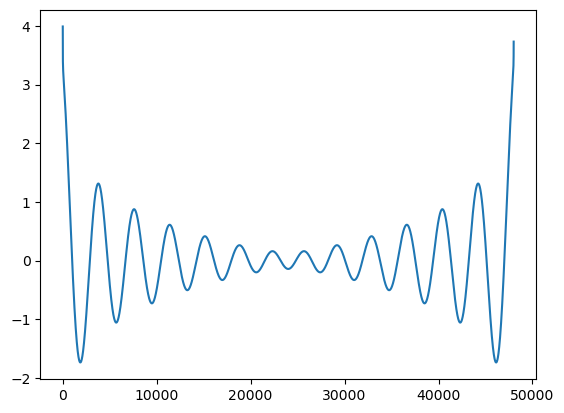

In [12]:
t = np.linspace(0,2*np.pi, 48000)

signal = np.sin(2*np.pi*2*t)

plt.plot(t,signal)
plt.show()
x = np.fft.fft(signal)
np.abs(x)

plt.plot(np.arange(len(x)),x)
plt.show()

for value in x: 
    print(value)

y = np.abs(x)
#y[0] = 0

print(y)

y[200000:]*np.exp(-1j*np.pi)
z = np.fft.ifft(y)

plt.plot(np.arange(len(z)),z)


print(np.fft.fftfreq(len(x)))

# ALTER WAS EIN GENERVE!!!!! 


die Infos über die frequenzamplituden aus dem spektrum müssen so geordnet sein: 
Das muss so aussehen:      a[0] = 0,  a[1] bis a[N//2] =  should contain the positive-frequency terms, a[n//2 + 1:] should contain the
 negative-frequency term, starting from the most negative frequency. 


# Aufgabe 1 c)



In [13]:
import sounddevice as sd

In [14]:
# Einzelnte Wellen abspielen 

for result in results: 
    sd.play(np.tile(result,100), samplerate=48000)
    sd.wait()


  

# Aufgabe 2 


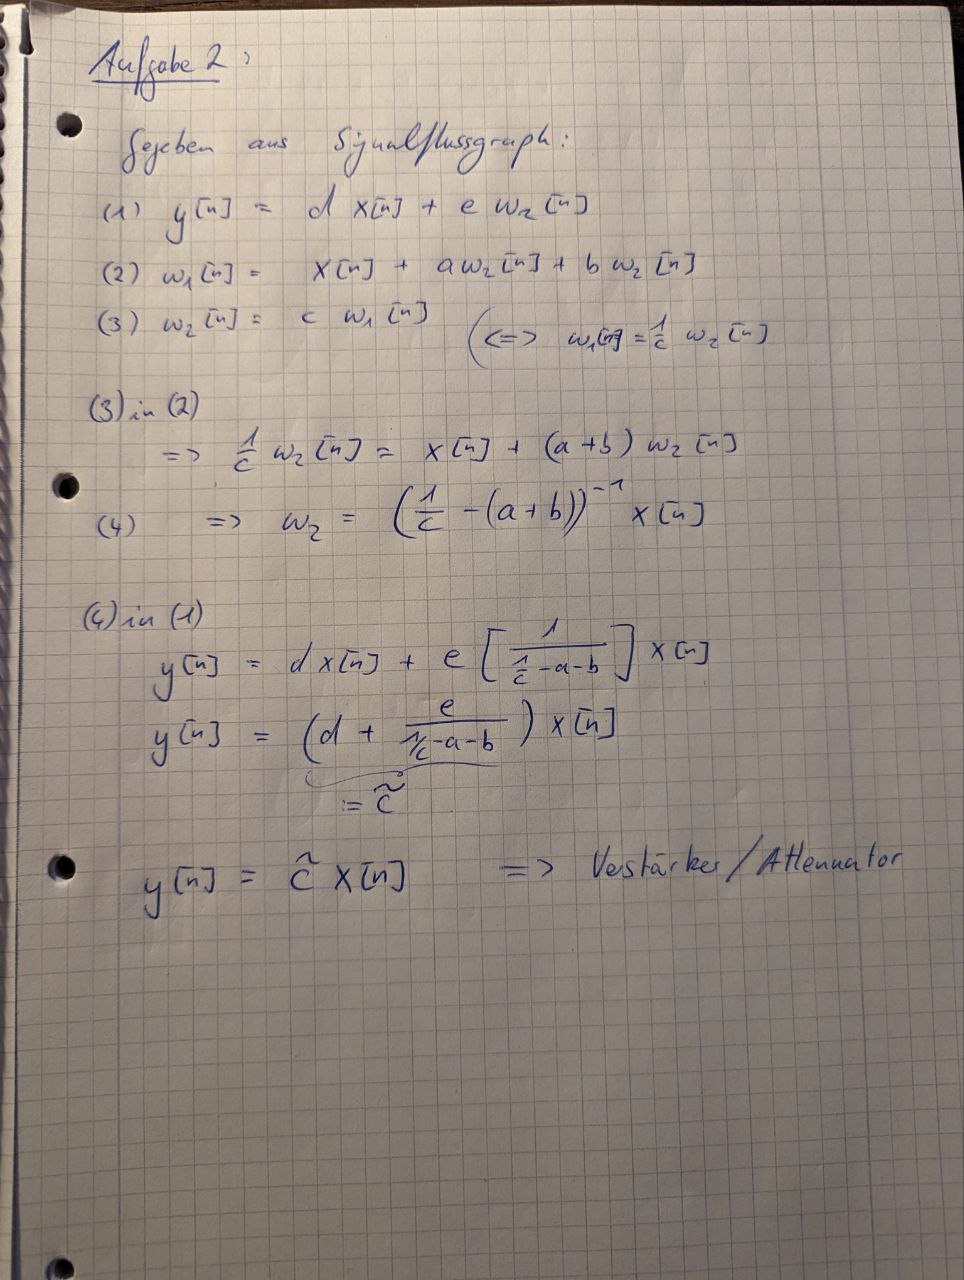

In [15]:
Image(filename="./A2.jpeg")

# Aufgabe 3

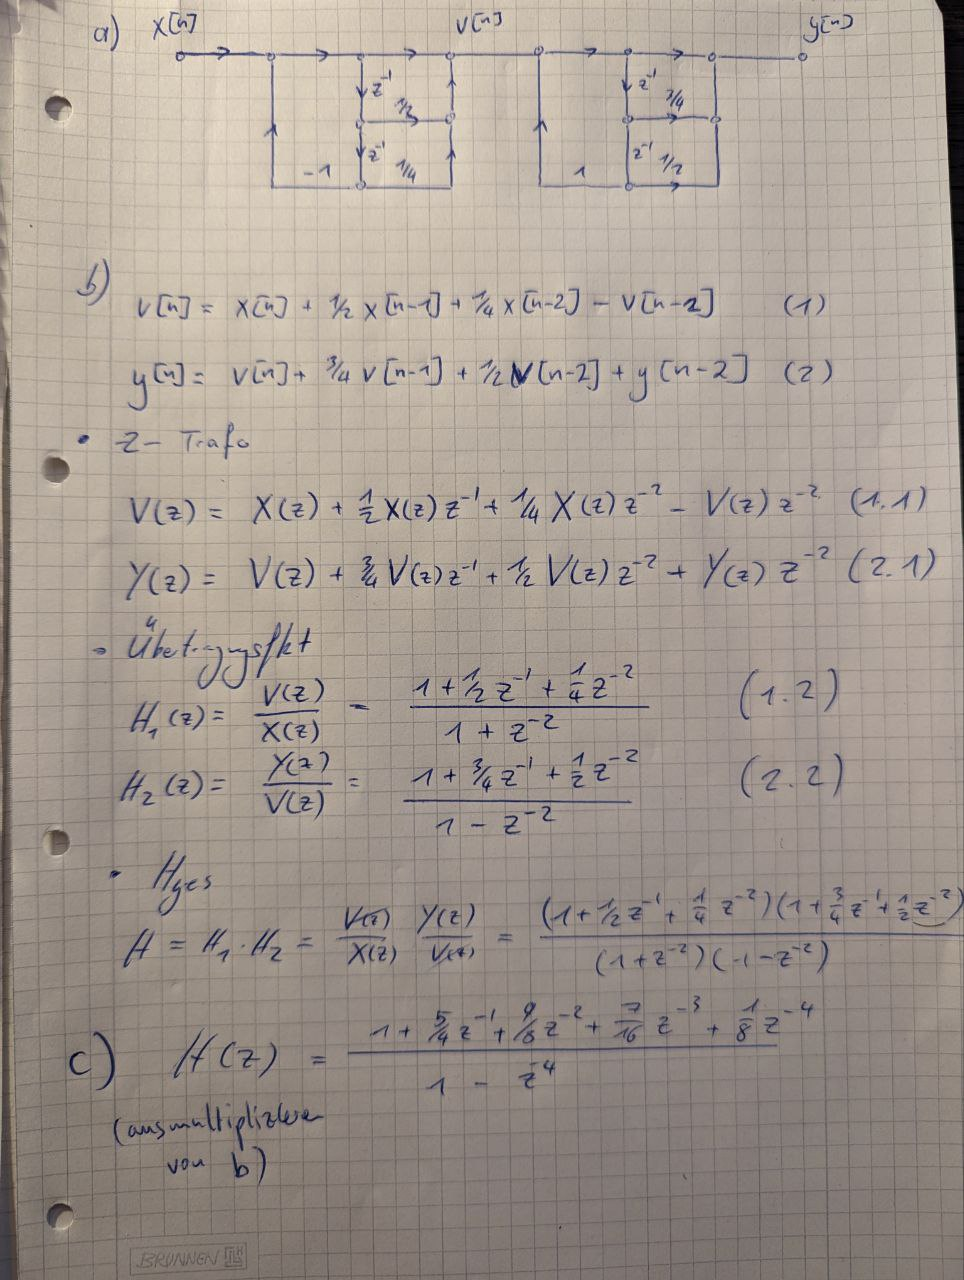

In [16]:
Image(filename="./A3.1.jpeg")

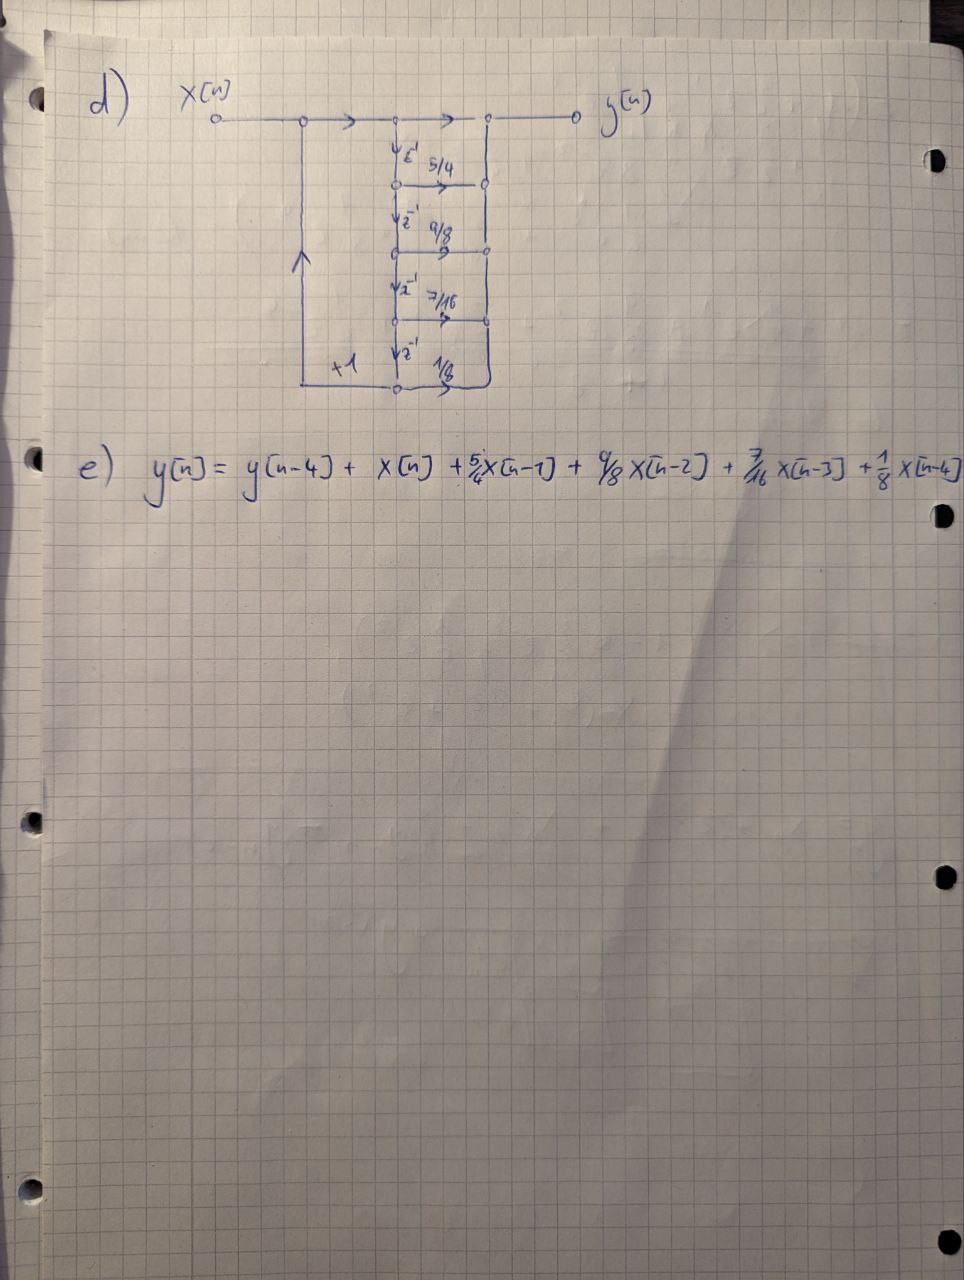

In [17]:
Image(filename="./A3.2.jpeg")

# Aufgabe 4

C:\Users\ankan\AppData\Local\Temp\ipykernel_25740\1716598997.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[i,1].set_xlim(0,fs/2)


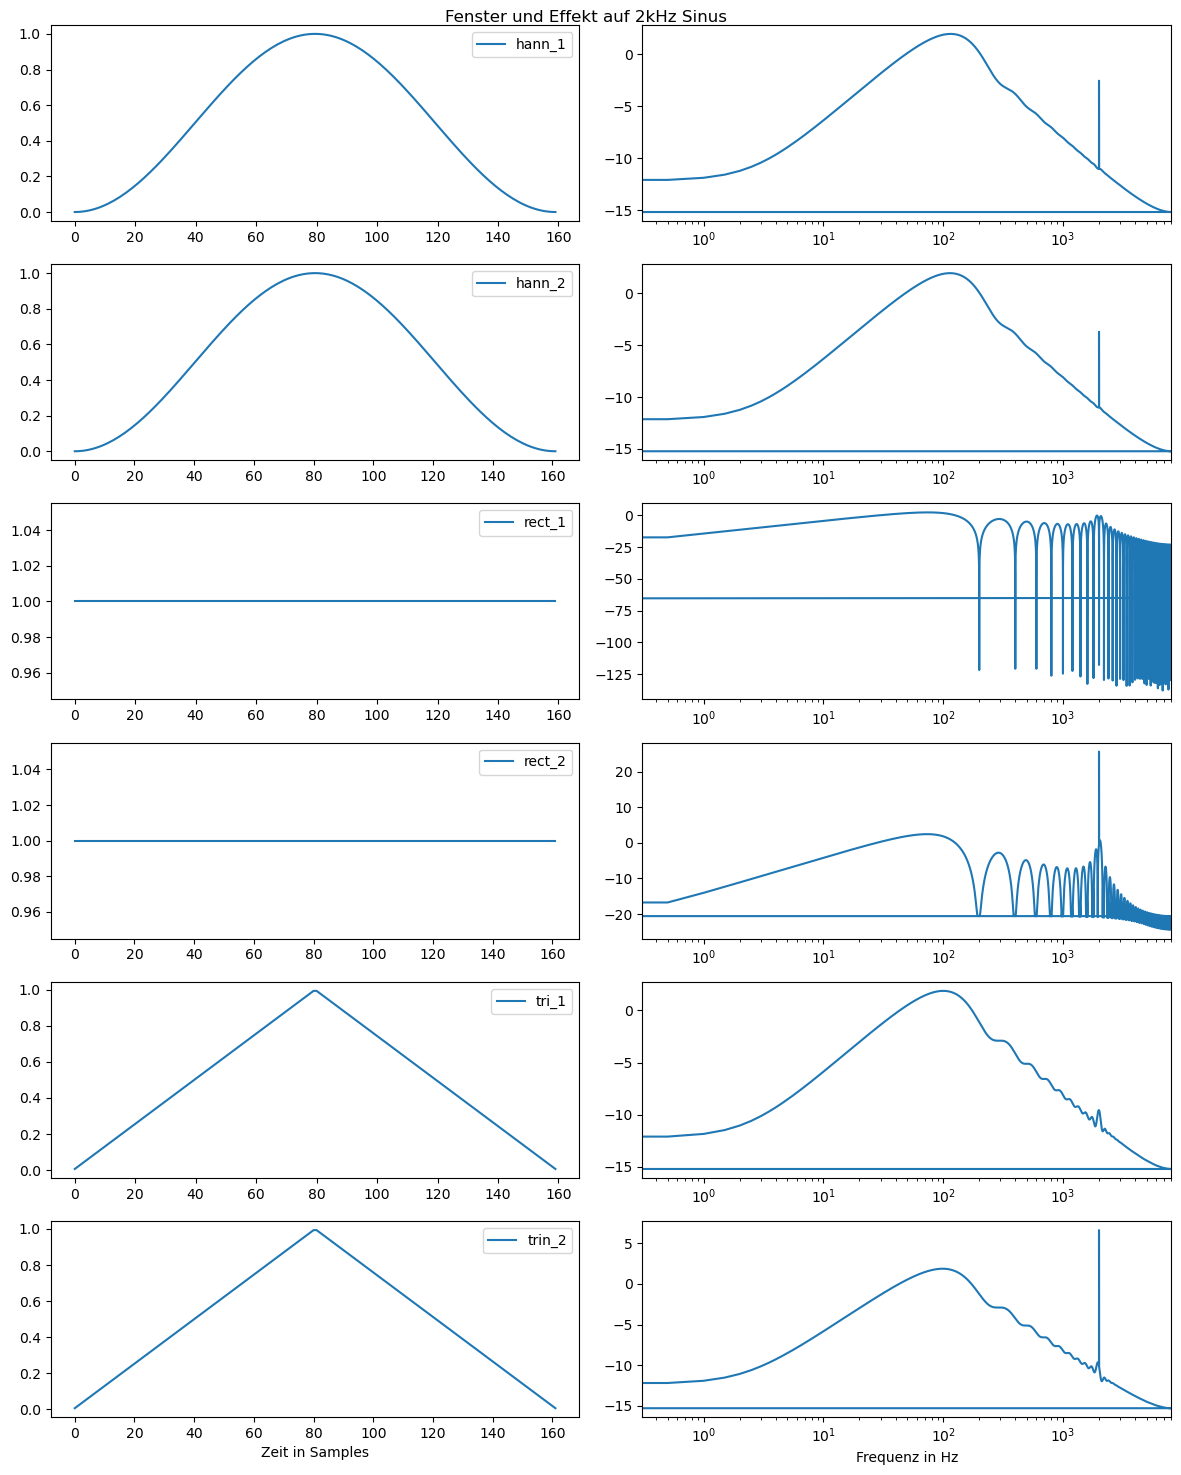

In [18]:
# Größen

fs = 16000              # [Hz]
f  = 2000               # [Hz]
t = np.arange(2*fs)         

length_1 = int((1/f)*fs * 20)       # [Samples] 
length_2 = int((1/f)*fs * 20.25)    # [Samples]


# create signal 

signal = np.sin(2*np.pi*f*t /fs)

# Fenster 

hann_1 = scipy.signal.windows.hann(length_1, sym=True) 
hann_2 = scipy.signal.windows.hann(length_2, sym=True) 

rectangular_1 = scipy.signal.windows.boxcar(length_1, sym=True)
rectangular_2 = scipy.signal.windows.boxcar(length_2, sym=True)

triangular_1 = scipy.signal.windows.triang(length_1, sym=True)
triangular_2 = scipy.signal.windows.triang(length_2, sym=True)

windows = [hann_1,hann_2,rectangular_1,rectangular_2,triangular_1,triangular_2]
names = ["hann_1", "hann_2", "rect_1", "rect_2", "tri_1", "trin_2"] 

# Filtern & Plotten 

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 15))

for i, window in enumerate(windows): 
    
    # Fenster plotten
    axes[i,0].plot(np.arange(len(window)), window, label=names[i])
    axes[i,0].legend()
    if i == 5: 
        axes[i,0].set_xlabel("Zeit in Samples")


    # filtern und in spektrum umrechnen
    filtered = scipy.signal.convolve(signal, window, mode="same", method="fft")*2 / np.sum(window)
    
    fft = 10*np.log10(np.abs(np.fft.fft(filtered)))
    fft_freq = np.fft.fftfreq(len(filtered))
    # Spektrum plottenm
    axes[i,1].semilogx(fft_freq*fs,fft, label=f"{names[i]}")
    axes[i,1].set_xlim(0,fs/2)
    if i == 5: 
        axes[i,1].set_xlabel("Frequenz in Hz")
    
plt.suptitle("Fenster und Effekt auf 2kHz Sinus")
plt.tight_layout()

plt.show()



Die Plots zeigen auf der linken Seite die verschiedenen Fenster, abwechselnd 160 und 162 Samples in Länge und rechts daneben das Spektrum des 2 kHz Signals nach der Faltung mit dem jeweiligen Fenster. 

Die Spektren sind je nach verwendetem Faltungsalgorithmus ("valid" oder "same") unterschiedlich. Bei der Verwendung von "same" wird das signal mit nullen gepadet, um ein Output mit der selben länge wie der Input zu generieren. Dadurch werden Randeffekte in das Signal eingefügt, da das Signal nun kein durchgängiger Sinus mit 2 kHz ist, sondern ein Wellenpaket mit einer Hüllkurve, welches zusätzliche Sinusterme zur korrekten Darstellung benötigt, die sichtbar im fft Spektrum auftauchen. Bei der zyklischen fft betrachten wir das signal als sich wiederholendes Signal mit einer Periodenlänge von hier 160 Samples (bzw. 162 Samples für das 2te Fenster), die eingefügten Randeffekte treten also mit einer Frequenz von 160000 Hz/160 = 100 Hz auf und haben somit ein ausgepräten Artefaktpeak bei 100 Hz. 

(Bei einer Verwendung vom "valid"-Algorithmus tritt dieses Problem nicht auf, da hier die Faltung nur auf dem Bereich von vollständigem Überlapp des Fensters und des Signals berechnet wird. Auf die Darstellung der Plots wurde an dieser Stelle verzichtet).

Was bei beiden Algorithmen auftritt, ist dass die Faltung mit einem Fenster einer Länge $T = \frac{n}{f_0}, \ n  \in \mathbb{N}$, also einem ganzzahligen Vielfachen der Periodenlänge, das ursprüngliche Signal herausmittelt. Im Beispiel des Rechteckfensters wird für jeden Punkt der Faltung das Integral  $\int_{a}^{a+n \cdot \lambda} \sin(\omega \cdot t) 1 \, dt = 0$ berechnet. Wenn die Fensterlänge ein nicht ganzzahliges Vielfaches der Periode ist, skaliert die Faltung die Amplitude des Signals (-> gleitender Mittelwert). Demensprechend verschwindet im Spektrum der Faltung die Amplitude nicht gänzlich.  

Interessant ist, dass beim Hann Fenster die Unterdrückung des Signals unabhängig von der Fensterlänge nicht in der gleichen Art wie bei den anderen beiden Beispielen zu Tage tritt. Sogar im Gegenteil. Der 2 kHz Signalpeak  nach Faltung mit dem  $T = \frac{n}{f_0}$ Fenster ist stärker als beim    $T \neq \frac{n}{f_0}$ Fenster. 




# Aufgabe 5

In [19]:
import sounddevice as sd

(3, 1)


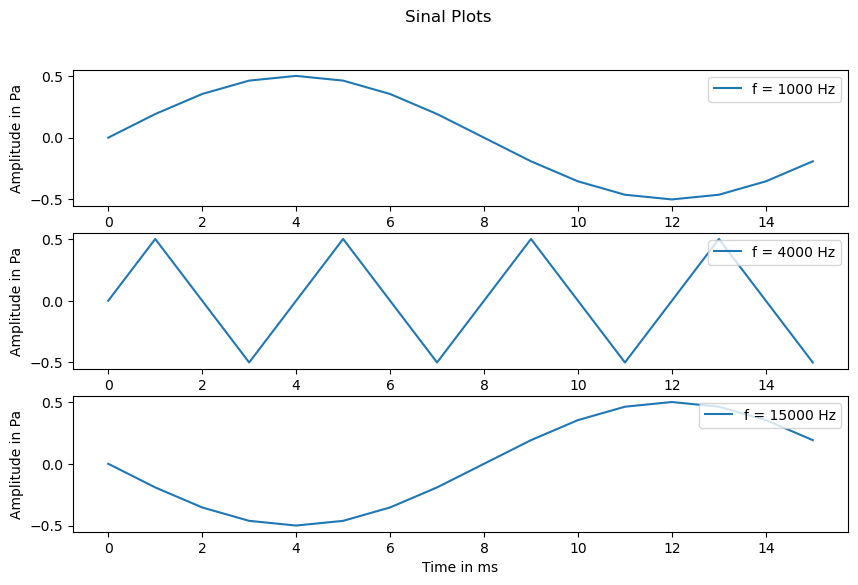

In [20]:
# Größen

fs = 16000                               # [Hz]
f  = np.array([[1000],[4000],[15000]])   # [Hz]
amplitude = 0.5                          # [Pa]
t = np.arange(fs)

print(f.shape)

# create signal 

signals = amplitude * np.sin(2*np.pi*f*t /fs)


for signal in signals: 
    sd.play(signal,samplerate=fs)
    sd.wait()


plt.figure(figsize=(10,6))

for i, signal in enumerate(signals):
    plt.subplot(3,1,i+1)
    plt.plot(t[:int(fs/1000)], signal[:int(fs/1000)], label = f"f = {f[i][0]} Hz")
    plt.xlabel("Time in ms")
    plt.ylabel("Amplitude in Pa")
    plt.legend(loc="upper right")
    plt.suptitle("Sinal Plots")




Bei der Wiedergabe hören wir jeweils einen Sinuston mit 1 kHz, 4 kHz und wieder 1 kHz. Beim letzteren lässt sich der Effekt auf aliasing zurückführen. Wir simulieren hier das Samplen eines kontinuierlichen Signals mit einer Abtastrate von 16 kHz. D.h. der Wert einer zeitlich, kontinuierlich oszillierenden Funktion wird alle 1/16000 Sekunden "betrachtet". 

Die von uns erfassbaren Oszillationen sind durch unsere Abtastrate beschränkt. Besonders deutlich wird dies, wenn eine Oszillation mit der gleichen Frequenz wie die Abtastrate betrachtet wird. Jedes mal, wenn wir einen Wert festhalten, hat die Oszillation bereits eine gesamte Periode durchlaufen und offenbart somit den gleichen Wert wie beim vorherigen "Betrachten". Somit bleibt uns die Oszillation vollends verborgen und wir sind der Auffassung ein ruhendes system zu betrachten. 

Wenn nun die Oszillation eine Frequenz $f_1$ aufweist, die [0.5, 1) mal der Abtastrate  $f_s$ entspricht, dann durchläuft die Schwingung die erste Hälfte einer Periode und einen gewissen Anteil der zweiten Hälfte. Effektiv wird so die Oszillation mit der Differenzfrequenz $f_d = f_s - f_1$ rückwärts abgerastert, was einem Phasensprung von $\pi$ entspricht und gut im Plot der 15Khz Schwingung zu sehen ist und ebenso im entsprechenden Audiosignal hörbar ist. 

Auuffällig ist noch, dass die 4 kHz Oszillation aussieht wie eine Dreieckswelle, jedoch klingt wie ein reiner Sinuston ohne Obertöne. Der zweite Term der Fourierreihe einr Dreieckswelle beim Dreifachen der Grundfrequenz, sprich bei 12 kHz. Da mit einer samplingrate von 16 Khz jedoch nur ein Bandbegrenztes Signal bis 8 kHz dargestellt werden kann, werden wahrscheinlich digital unter der Laube der sounddevice.play() Funktion diese Obertöne unterschlagen. 